<div style="text-align: center;">
    <h1 style="font-size:50px">Sales Prediction Project</h1>
</div>

<h1>Objective</h1>

<p style="font-size:15px;line-height: 1.5;">The objective of this project is to develop machine learning models capable of accurately predicting sales based on advertising expenses across different mediums: TV, radio, and newspaper. The aim is to provide businesses with insights into the effectiveness of their advertising strategies, facilitating informed decision-making to optimize marketing budgets.</p>

<h1>Dataset</h1>

<p style="font-size:15px;line-height: 1.5;">The dataset consists of 200 rows and 5 columns.</p>

<ul style="font-size:15px;line-height: 1.5;">
    <li><b>Features</b>: TV Advertising Expenditure, Radio Advertising Expenditure, Newspaper Advertising Expenditure</li>
    <li><b>Target</b>: Sales</li>
</ul>

<h1>Approach</h1>

<ul style="font-size:15px;line-height: 1.5;">
    <li>First, the dataset is explored to understand its structure.</li>
    <li>Visualization of the dataset is done to show the relation between features and target variables.</li>
    <li>Pre-Processing of dataset is done by splitting the dataset into training and testing sets in 8:2 ratio.</li>
    <li>6 different models are used for price prediction:
        <ul style="font-size:15px;line-height: 1.5;">
            <li>Linear Regressor</li>
            <li>Lasso Regressor</li>
            <li>Decision Tree Regressor</li>
            <li>Random Forest Regressor</li>
            <li>Support Vector Regressor</li>
            <li>K-Nearest Neighbors Regressor</li>
        </ul>
    </li>
    <li>Each model is saved as a '.pkl' file.</li>
    <li>Users will be prompted to load the model of their choice and enter the corresponding features in an interactive manner to make predictions.</li>
</ul>

# Import The Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Load The Dataset

In [3]:
dataset = pd.read_csv('Advertising.csv')
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Printing Information About The Dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Check For Missing Values

In [5]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

# Statistics Of Dataset Like Mean, Median, etc.

In [6]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Visualization Of Dataset

## TV Advertising Expenditure VS Sales

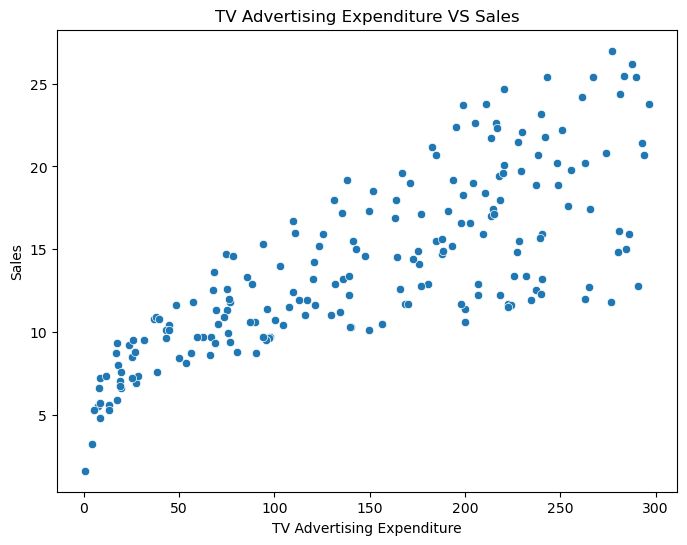

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x='TV', y='Sales')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('TV Advertising Expenditure VS Sales')
plt.show()

## Radio Advertising Expenditure VS Sales

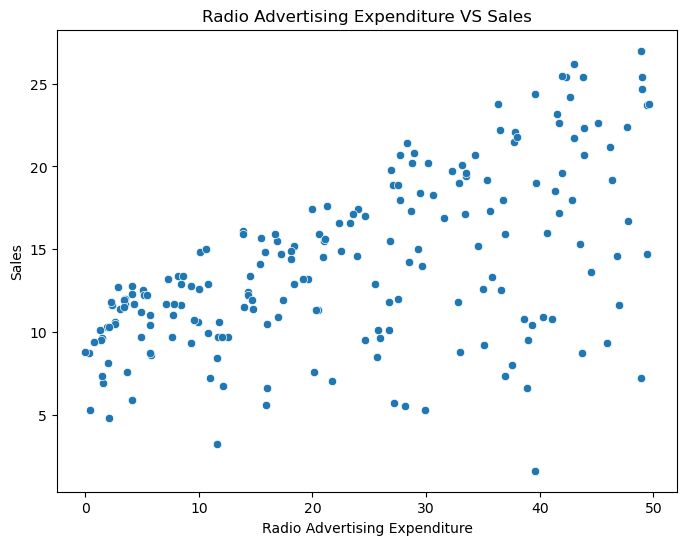

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x='Radio', y='Sales')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Radio Advertising Expenditure VS Sales')
plt.show()

## Newspaper Advertising Expenditure VS Sales

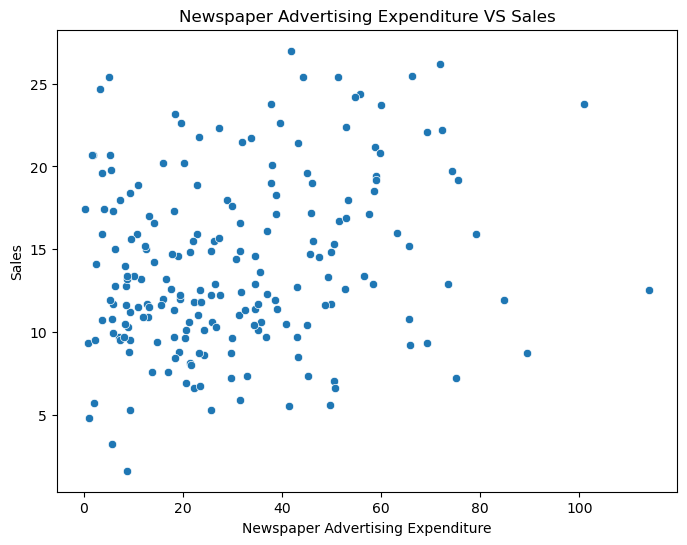

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x='Newspaper', y='Sales')
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Newspaper Advertising Expenditure VS Sales')
plt.show()

# Separating The Training Data And Target Variable

In [10]:
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

## Printing The Training Data

In [11]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


## Printing The Target Variable

In [12]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


# Splitting The Dataset Into Training And Testing Sets

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


# Linear Regression

## Training And Testing The Model

Error Report : 0.8746629988675778


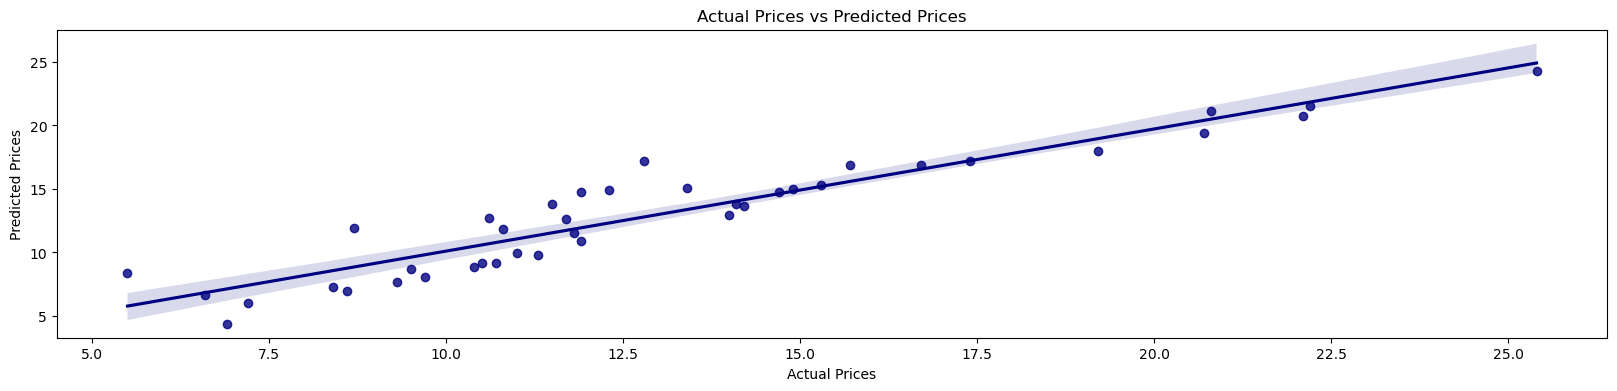

In [14]:
r2_scores = {}

model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Linear Regression'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [15]:
import joblib
filename = 'linear_regression_model.pkl'
joblib.dump(model1, filename)
print(f"Model saved as {filename}")

Model saved as linear_regression_model.pkl


# Lasso Regression

## Training And Testing The Model

Error Report : 0.8752748390246957


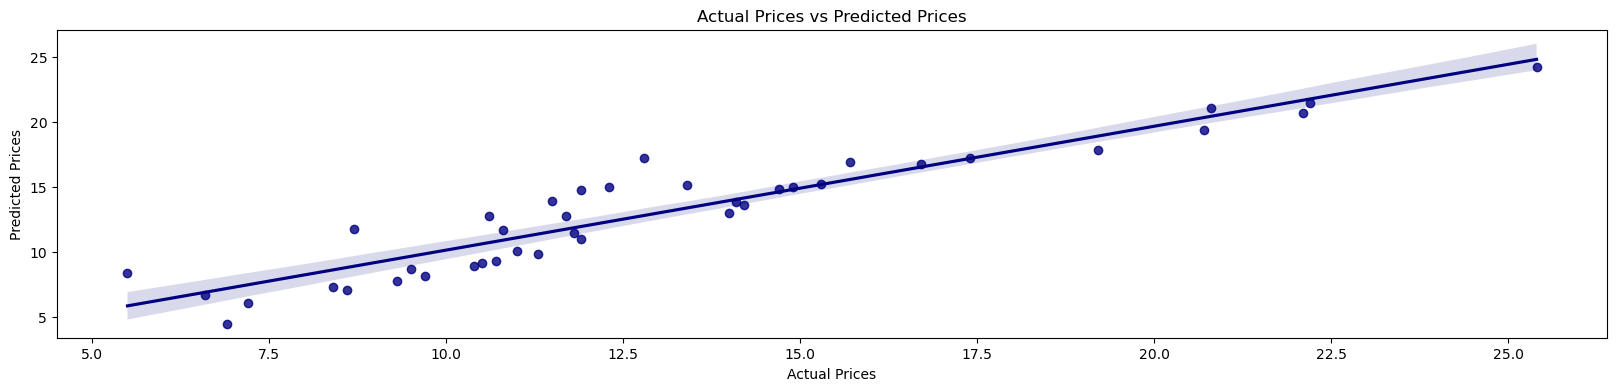

In [16]:
model2 = Lasso()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Lasso Regression'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [17]:
filename = 'lasso_regression_model.pkl'
joblib.dump(model2, filename)
print(f"Model saved as {filename}")

Model saved as lasso_regression_model.pkl


# Decision Tree Regressor

## Training And Testing The Model

Error Report : 0.9634364303526222


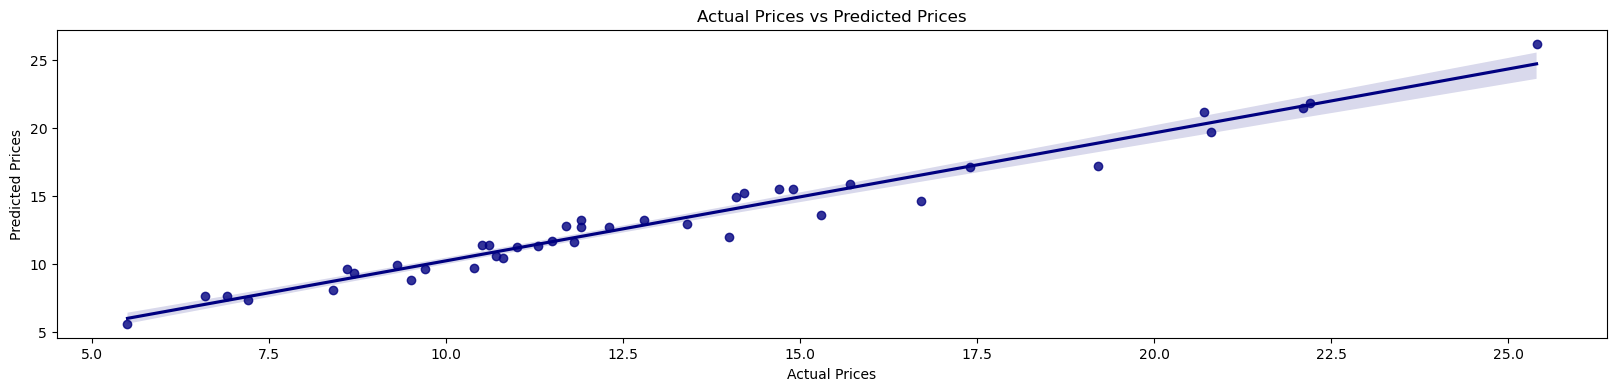

In [18]:
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Decision Tree'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [19]:
filename = 'decision_tree_model.pkl'
joblib.dump(model3, filename)
print(f"Model saved as {filename}")

Model saved as decision_tree_model.pkl


# Random Forest Regressor

## Training And Testing The Model

Error Report : 0.9788910559701138


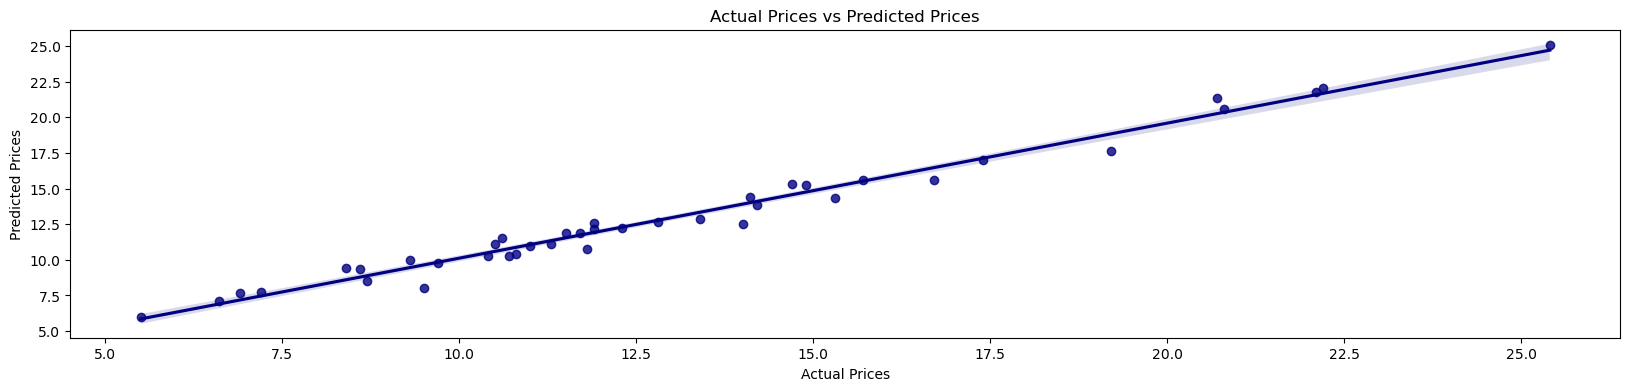

In [20]:
model4 = RandomForestRegressor()
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Random Forest'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [21]:
filename = 'random_forest_model.pkl'
joblib.dump(model4, filename)
print(f"Model saved as {filename}")

Model saved as random_forest_model.pkl


# Support Vector Regressor

## Training And Testing The Model

Error Report : 0.8875037683973305


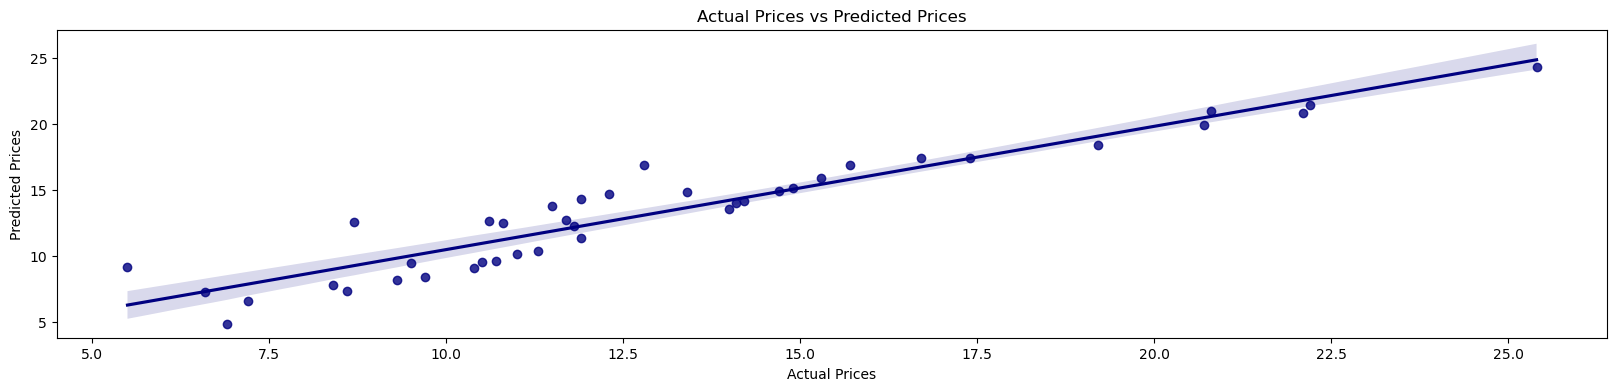

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model5 = SVR(kernel='linear')  
model5.fit(x_train_scaled, y_train)
y_pred = model5.predict(x_test_scaled)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Support Vector Machine'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [23]:
filename = 'svr_model.pkl'
joblib.dump(model5, filename)
print(f"Model saved as {filename}")

Model saved as svr_model.pkl


# K-Nearest Neighbors Regressor

## Training And Testing The Model

Error Report : 0.9587126778992481


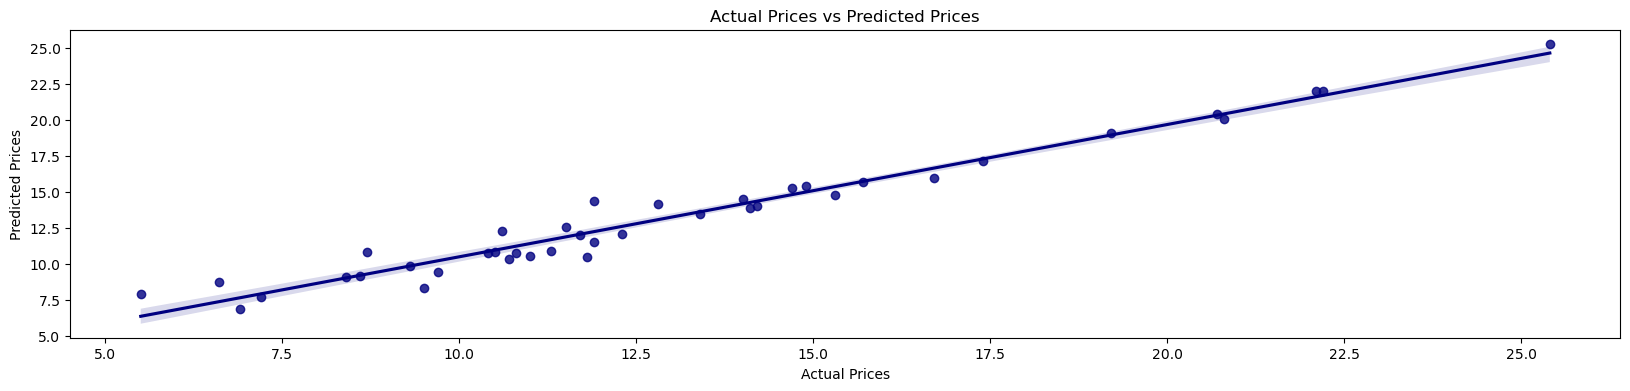

In [24]:
model6 = KNeighborsRegressor(n_neighbors=5)
model6.fit(x_train_scaled, y_train)
y_pred = model6.predict(x_test_scaled)
error = metrics.r2_score(y_test, y_pred)
r2_scores['KNN Neighbours'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [25]:
filename = 'knn_model.pkl'
joblib.dump(model6, filename)
print(f"Model saved as {filename}")

Model saved as knn_model.pkl


<h1>R<sup>2</sup> Score Of Different Models</h1>

In [26]:
for name, r2 in r2_scores.items():
    print(f"{name}: R-squared = {r2:.4f}")

Linear Regression: R-squared = 0.8747
Lasso Regression: R-squared = 0.8753
Decision Tree: R-squared = 0.9634
Random Forest: R-squared = 0.9789
Support Vector Machine: R-squared = 0.8875
KNN Neighbours: R-squared = 0.9587


# Taking User Input And Making Predictions

In [2]:
import warnings
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

model_files = {
    'Linear Regression': 'linear_regression_model.pkl',
    'Lasso Regression': 'lasso_regression_model.pkl',
    'Decision Tree': 'decision_tree_model.pkl',
    'Random Forest': 'random_forest_model.pkl',
    'Support Vector Machine': 'svr_model.pkl',
    'KNN Neighbours': 'knn_model.pkl'
}

def choose_model():
    print("Choose a model to load:")
    for idx, model_name in enumerate(model_files.keys(), 1):
        print(f"{idx}. {model_name}")
    while True:
        try:
            choice = int(input("Enter your choice (1-6): "))
            if choice < 1 or choice > 6:
                raise ValueError("Please enter a number between 1 and 6.")
            break
        except ValueError as e:
            print(e)
    selected_model_name = list(model_files.keys())[choice - 1]
    selected_model_file = model_files[selected_model_name]
    return selected_model_name, selected_model_file

def load_selected_model(selected_model_file):
    loaded_model = joblib.load(selected_model_file)
    return loaded_model

def get_user_input():
    print("Please enter the following advertisement expenditure details:")
    Tv = float(input("Enter advertising expenses for TV: "))
    Radio = float(input("Enter advertising expenses for Radio: "))
    Newspaper = float(input("Enter advertising expenses for Newspaper: "))
    user_input_df = pd.DataFrame([[Tv, Radio, Newspaper]], columns=['TV', 'Radio', 'Newspaper'])
    return user_input_df

def make_prediction(loaded_model, selected_model_name):
    user_input_df = get_user_input()
    if selected_model_name == 'Support Vector Machine' or selected_model_name == 'KNN Neighbours':
        scaler = StandardScaler()
        user_input_scaled = scaler.fit_transform(user_input_df)
        predicted_sales = loaded_model.predict(user_input_scaled)
    else:
        predicted_sales = loaded_model.predict(user_input_df)
    print(f"The predicted sales for the given advertisement details using {selected_model_name} is: {predicted_sales[0]:.2f}")

selected_model_name, selected_model_file = choose_model()
loaded_model = load_selected_model(selected_model_file)

while True:
    make_prediction(loaded_model, selected_model_name)
    while True:
        yes_or_no = input("Do you want to quit? (yes/no) ").lower()
        
        if yes_or_no == 'yes':
            break
        elif yes_or_no == 'no':
            while True:
                continue_or_change = input("Do you want to continue with the same model or choose a different model? (continue/change): ").lower()

                if continue_or_change == 'change':
                    print()
                    selected_model_name, selected_model_file = choose_model()
                    loaded_model = load_selected_model(selected_model_file)
                    break
                elif continue_or_change == 'continue':
                    break
                else:
                    print("Please enter either 'continue' or 'change'.")
            break
        else:
            print("Please enter either 'yes' or 'no'.")
    if yes_or_no == 'yes':
        break

Choose a model to load:
1. Linear Regression
2. Lasso Regression
3. Decision Tree
4. Random Forest
5. Support Vector Machine
6. KNN Neighbours
Enter your choice (1-6): 1
Please enter the following advertisement expenditure details:
Enter advertising expenses for TV: 8.6
Enter advertising expenses for Radio: 2.1
Enter advertising expenses for Newspaper: 1
The predicted sales for the given advertisement details using Linear Regression is: 3.49
Do you want to quit? (yes/no) no
Do you want to continue with the same model or choose a different model? (continue/change): change

Choose a model to load:
1. Linear Regression
2. Lasso Regression
3. Decision Tree
4. Random Forest
5. Support Vector Machine
6. KNN Neighbours
Enter your choice (1-6): 3
Please enter the following advertisement expenditure details:
Enter advertising expenses for TV: 97.5
Enter advertising expenses for Radio: 7.6
Enter advertising expenses for Newspaper: 7.2
The predicted sales for the given advertisement details using